In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd
import numpy as np
import pickle

In [ ]:
path = "/content/drive/MyDrive/dataset"

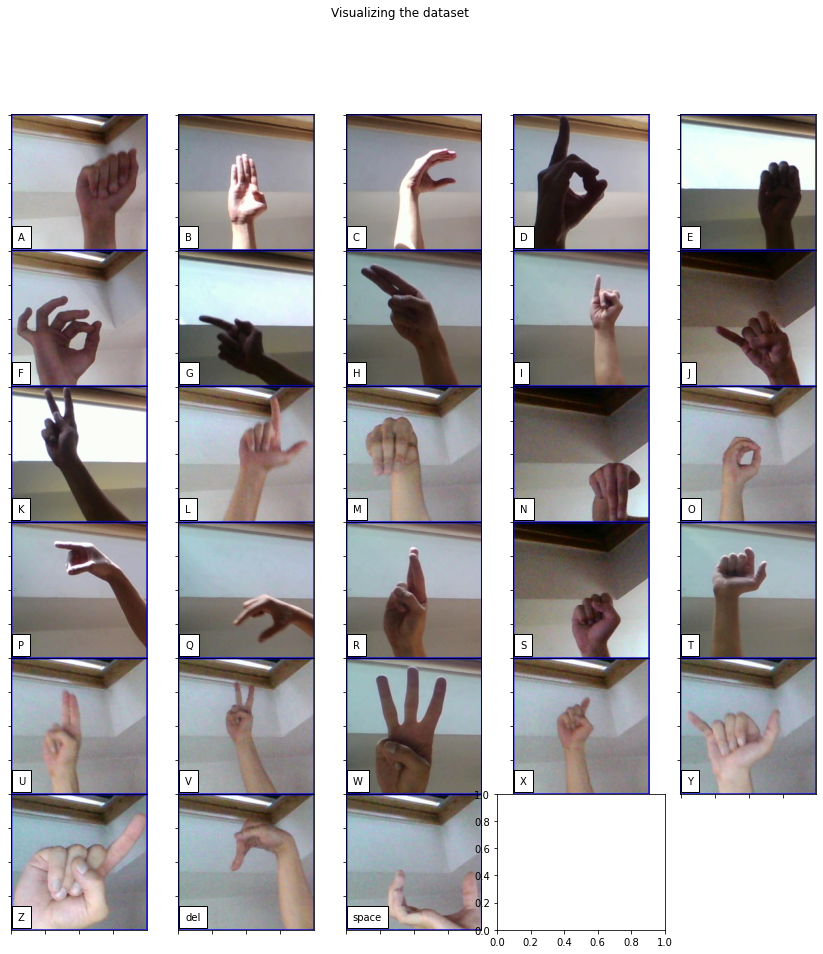

In [ ]:
fig,axes = plt.subplots(6,5,figsize=(15,15))
ind = 0
for _dir in sorted(os.listdir(path)):
    imgPath = os.path.join(path,_dir)
    jpg = np.random.choice(os.listdir(imgPath),size=1)[0]
    _imgPath = os.path.join(imgPath,jpg)
    img = image.load_img(_imgPath)
    axes[ind//5][ind%5].set_xticklabels([])
    axes[ind//5][ind%5].set_yticklabels([])
    axes[ind//5][ind%5].set_aspect('equal')
    axes[ind//5][ind%5].imshow(img)
    axes[ind//5][ind%5].text(10,185,f'{_dir}',bbox={'facecolor': 'white', 'pad': 6})
    ind += 1
axes[5][4].remove()
plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle('Visualizing the dataset')
fig.show()

second


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import tensorflow as tf

In [ ]:
features=[]
labels=[]
classes = ["A","B","C","D","del","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","space","T","U","V","W","X","Y","Z"]
for i in range(len(classes)):
    file_list = glob.glob(path + "/" + classes[i] + "/*.jpg")
    for item in range(100):
        features.append(file_list[item])
        labels.append([i])
print("Dataset Feature size : ",len(features))
print("Dataset labels size : ",len(labels))

Dataset Feature size :  2800
Dataset labels size :  2800


In [ ]:
#Shuffle the array
features,labels = shuffle(features,labels,random_state=0)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for i in features:
    x_train.append(cv2.imread(i,cv2.IMREAD_COLOR))
    x_train[-1] = np.reshape(x_train[-1],[200,200,3])

for i in labels:
    y_train.append(i)

In [ ]:
print (y_train)

[[27]
 [ 5]
 [24]
 ...
 [20]
 [15]
 [26]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)
print("Train data : ",len(x_train),len(y_train))
print("Validation data : ",len(x_test),len(y_test))

Train data :  2240 2240
Validation data :  560 560


In [ ]:
model =Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(200,200,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(29,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 66, 66, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 66, 66, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 66, 66, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                  

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)
y_test = np.array(y_test)
history = model.fit(x_train,
          y_train,
          epochs=15,
          validation_data = (x_test,y_test))

Epoch 1/15
70/70 [==============================] - 12s 158ms/step - loss: 2.9956 - accuracy: 0.2424 - val_loss: 1.5256 - val_accuracy: 0.6161
Epoch 2/15
70/70 [==============================] - 10s 146ms/step - loss: 1.2753 - accuracy: 0.6219 - val_loss: 0.7005 - val_accuracy: 0.8089
Epoch 3/15
70/70 [==============================] - 10s 146ms/step - loss: 0.6858 - accuracy: 0.7933 - val_loss: 0.4864 - val_accuracy: 0.8196
Epoch 4/15
70/70 [==============================] - 11s 154ms/step - loss: 0.4027 - accuracy: 0.8826 - val_loss: 0.3248 - val_accuracy: 0.9089
Epoch 5/15
70/70 [==============================] - 10s 147ms/step - loss: 0.2590 - accuracy: 0.9237 - val_loss: 0.1721 - val_accuracy: 0.9554
Epoch 6/15
70/70 [==============================] - 10s 147ms/step - loss: 0.1943 - accuracy: 0.9460 - val_loss: 0.1727 - val_accuracy: 0.9500
Epoch 7/15
70/70 [==============================] - 10s 147ms/step - loss: 0.1205 - accuracy: 0.9612 - val_loss: 0.1213 - val_accuracy: 0.9661

In [ ]:
model.save('cnn_100.h5')

(200, 200, 3)

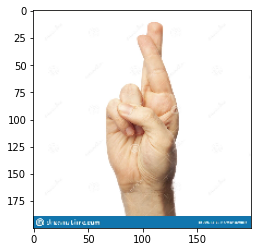

In [ ]:
custom_img_dir = 'test_r.jpg'
# img_dir = os.listdir(custom_img_dir)
img = cv2.imread(custom_img_dir)
img = cv2.resize(img, (200,200))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255
custom_img = np.array(img)
plt.imshow(custom_img)
custom_img.shape

In [ ]:
img_list = []
img_list.append(custom_img)
img_list = np.array(img_list)
img_list.shape

(1, 200, 200, 3)

In [ ]:
pred = model.predict(img_list)
pred = np.argmax(pred)
pred

20

In [ ]:
loaded_model = tf.keras.models.load_model("cnn_100.h5")
loaded_model.build()

In [ ]:
from numpy import argmax
from sklearn import metrics

y_pred_cnn = loaded_model.predict(x_test)
y_pred_cnn = argmax(y_pred_cnn, axis=-1).astype('int')

#accuracy score
score=metrics.accuracy_score(y_pred_cnn, y_test)
print('-----------CNN Accuracy on test set-------------------')
print(score)

-----------CNN Accuracy on test set-------------------
0.9839285714285714
